## Arrest Rate Dataset

Police Arrest Data will be defined as the arrest rate per 1,000 residents in each neighborhood, calculated by dividing the total number of arrests by the neighborhood’s population and multiplying by 1,000. Lower rates indicate safer communities.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

arrest_csv = "https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f"
arrests = pd.read_csv(arrest_csv)
arrests = arrests.rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood'})
pop_csv ="https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv"
population = pd.read_csv(pop_csv)
population = population.rename(columns={'Estimate; Total': 'Population'})
population = population.drop(columns = ['Margin of Error; Total'])
#print(arrests.head())
#print(arrests.columns)

#print(population.columns)

#possibly drop all the indexes that are unnecessary.

Now we are going to count the total arrests by neighborhood.

In [20]:
# Count total arrests by neighborhood

arrest_counts = arrests.groupby('Neighborhood').size().reset_index(name='Total_Arrests')
print(arrest_counts)

           Neighborhood  Total_Arrests
0      Allegheny Center           1244
1        Allegheny West            130
2             Allentown            947
3             Arlington            312
4     Arlington Heights            155
..                  ...            ...
93  Upper Lawrenceville            189
94             West End            290
95         West Oakland            325
96             Westwood            226
97              Windgap            124

[98 rows x 2 columns]


This code merges arrest and population data, filters out small neighborhoods, calculates arrests per 1,000 residents, and shows the top 5 neighborhoods by that rate.

In [36]:
# Convert the Id column to integer
population['Id'] = population['Id'].astype(int)

# Merge with arrest data
arrest_rate = arrest_counts.merge(population, on='Neighborhood', how='left')

#Remove neighborhods with less than 1000 ppl
arrest_rate = arrest_rate[arrest_rate['Population'] >= 1000]

# Calculate arrests per 1,000 residents
arrest_rate['Arrests_Per_1k'] = (arrest_rate['Total_Arrests'] / arrest_rate['Population']) * 1000

arrest_rate.sort_values(by=['Arrests_Per_1k'], ascending=True).head(5)

,Neighborhood,Total_Arrests,Id,Population,Arrests_Per_1k
19,Central Northside,23,19.0,2892.0,7.952974
82,Squirrel Hill North,290,77.0,11336.0,25.582216
88,Swisshelm Park,43,83.0,1345.0,31.970260
72,Regent Square,37,67.0,1033.0,35.818006
85,Stanton Heights,223,80.0,4761.0,46.838899


This will plot the top 10 neighborhoods with the lowest arrest rates. 

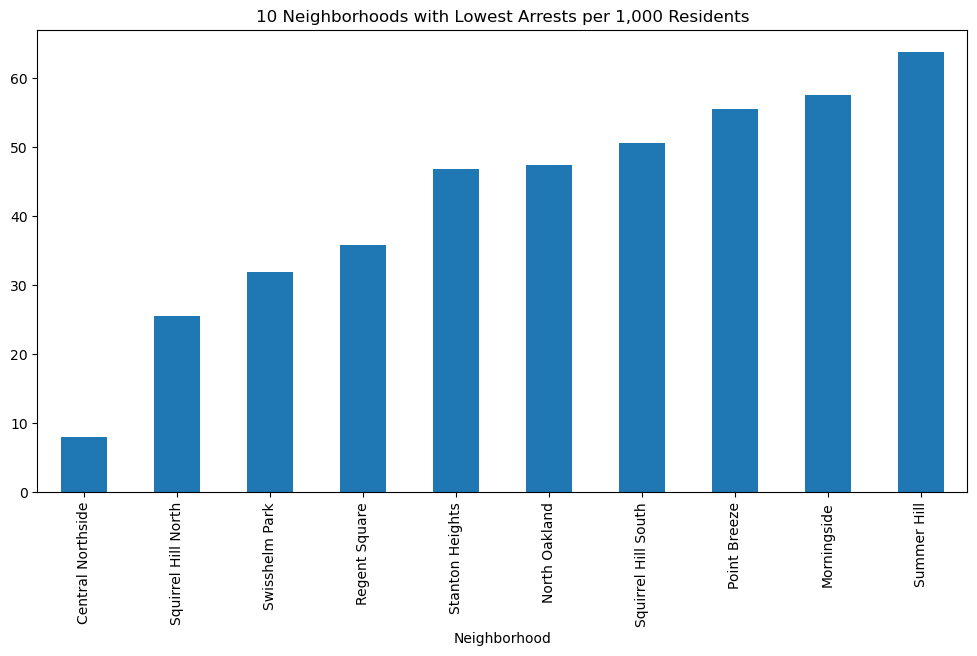

In [38]:
# Sort by arrests per 1k ascending and select bottom 10
lowest_arrests = arrest_rate.sort_values(by='Arrests_Per_1k', ascending=True).head(10)

# Plot as a bar chart
lowest_arrests.plot(
    kind='bar', 
    x='Neighborhood', 
    y='Arrests_Per_1k', 
    legend=False, 
    figsize=(12,6),
    title='10 Neighborhoods with Lowest Arrests per 1,000 Residents'
)